### Speech Commands: Audio Classification Task

In [1]:
# Derived from Speech Commands 18w
# https://arxiv.org/pdf/1804.03209.pdf

### Snap Clap Whistle: Model Inspection

In [2]:
import os
import pandas as pd
import json
import seaborn as sns
import tensorflow as tf
tf.__version__

'2.1.0'

In [3]:
os.chdir(r'C:\Users\rek\Downloads')
filename = 'model.json'

In [4]:
with open(filename,'r') as f:
    json_str = f.read().replace('\n', '')
print(json_str)

{"modelTopology":{"class_name":"Model","config":{"name":"model2","layers":[{"name":"conv2d_1_input","class_name":"InputLayer","config":{"batch_input_shape":[null,43,232,1],"dtype":"float32","sparse":false,"name":"conv2d_1_input"},"inbound_nodes":[]},{"name":"conv2d_1","class_name":"Conv2D","config":{"filters":8,"kernel_initializer":{"class_name":"VarianceScaling","config":{"scale":1,"mode":"fan_avg","distribution":"uniform","seed":null}},"kernel_regularizer":null,"kernel_constraint":null,"kernel_size":[2,8],"strides":[1,1],"padding":"valid","data_format":"channels_last","dilation_rate":[1,1],"activation":"relu","use_bias":true,"bias_initializer":{"class_name":"Zeros","config":{}},"bias_regularizer":null,"activity_regularizer":null,"bias_constraint":null,"name":"conv2d_1","trainable":false,"batch_input_shape":[null,43,232,1],"dtype":"float32"},"inbound_nodes":[[["conv2d_1_input",0,0,{}]]]},{"name":"max_pooling2d_1","class_name":"MaxPooling2D","config":{"pool_size":[2,2],"padding":"valid

In [5]:
# Helper function thanks to bskaggs @ stackoverflow
# https://stackoverflow.com/questions/18873066/pretty-json-formatting-in-ipython-notebook

import uuid
from IPython.display import display_javascript, display_html, display
import json

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)
        


In [6]:
data = json.load(open(filename))   # dict
RenderJSON(data)

In [7]:
my_model = tf.keras.models.model_from_config(data['modelTopology'])

In [8]:
my_model.summary()

Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  [(None, 43, 232, 1)]      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 225, 8)        136       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 112, 8)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 109, 32)       2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 51, 32)         8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 25, 32)         0    

In [9]:
# m00.load_weights('weights.bin')
# Can this be opened with Python? Instructions for JS only

### Whistle

In [10]:
whistle_jsonfile = \
    r'C:\Users\rek\projects\DLA\202010_teachable_machines\000_snap_clap_whistle\sound_samples\whistle-samples\samples.json'
whistle = json.load(open(whistle_jsonfile))

In [11]:
for w in whistle:
    print(w.keys())

dict_keys(['frequencyFrames', 'blob', 'startTime', 'endTime', 'recordingDuration', 'blobFilePath'])
dict_keys(['frequencyFrames', 'blob', 'startTime', 'endTime', 'recordingDuration', 'blobFilePath'])
dict_keys(['frequencyFrames', 'blob', 'startTime', 'endTime', 'recordingDuration', 'blobFilePath'])
dict_keys(['frequencyFrames', 'blob', 'startTime', 'endTime', 'recordingDuration', 'blobFilePath'])
dict_keys(['frequencyFrames', 'blob', 'startTime', 'endTime', 'recordingDuration', 'blobFilePath'])
dict_keys(['frequencyFrames', 'blob', 'startTime', 'endTime', 'recordingDuration', 'blobFilePath'])
dict_keys(['frequencyFrames', 'blob', 'startTime', 'endTime', 'recordingDuration', 'blobFilePath'])
dict_keys(['frequencyFrames', 'blob', 'startTime', 'endTime', 'recordingDuration', 'blobFilePath'])


In [12]:
print([w['startTime'] for w in whistle])
print([w['endTime'] for w in whistle])
print([w['recordingDuration'] for w in whistle])

[7.585375000000001, 6.50175, 5.418125, 4.3345, 3.250875, 2.16725, 1.083625, 0]
[8.669, 7.585375000000001, 6.50175, 5.418125, 4.3345, 3.250875, 2.16725, 1.083625]
[8.669, 8.669, 8.669, 8.669, 8.669, 8.669, 8.669, 8.669]


In [13]:
df = pd.DataFrame(w['frequencyFrames'])

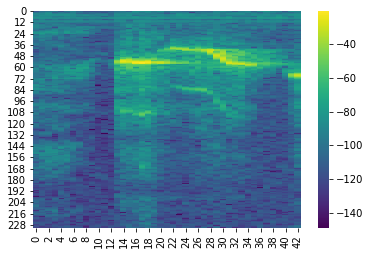

In [14]:
sns.heatmap(df.T,cmap='viridis')

### A-880

In [15]:
a880_jsonfile = \
    r'C:\Users\rek\projects\DLA\202010_teachable_machines\000_snap_clap_whistle\sound_samples\A880-0\samples.json'
a880 = json.load(open(a880_jsonfile))

In [16]:
a6 = [pd.DataFrame(a['frequencyFrames']) for a in a880]

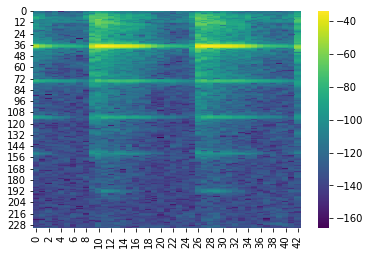

In [17]:
sns.heatmap(a6[7].T,cmap='viridis')

### A-110

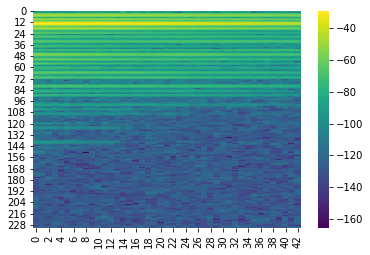

In [18]:
a110_jsonfile = \
    r'C:\Users\rek\projects\DLA\202010_teachable_machines\000_snap_clap_whistle\sound_samples\A110-0\samples.json'
a110 = json.load(open(a110_jsonfile))
a3 = [pd.DataFrame(a['frequencyFrames']) for a in a110]
sns.heatmap(a3[7].T,cmap='viridis')

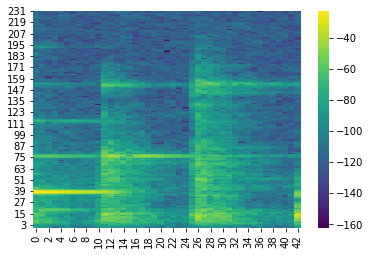

In [19]:
aMulti_file = \
    r'C:\Users\rek\projects\DLA\202010_teachable_machines\000_snap_clap_whistle\sound_samples\MultiOctaveA-0\samples.json'
a_span_j = json.load(open(aMulti_file))
a_span = [pd.DataFrame(a['frequencyFrames']) for a in a_span_j]
sns.heatmap(a_span[2].T.iloc[::-1],cmap='viridis')

### Sine wave A-880:

In [20]:
j_file = \
    r'C:\Users\rek\projects\DLA\202010_teachable_machines\000_snap_clap_whistle\sound_samples\Sine-samples-880\samples.json'
jj = json.load(open(j_file))
a = [pd.DataFrame(x['frequencyFrames']) for x in jj]

0     38
1     38
2     38
3     38
4     38
5     38
6     38
7     38
8     38
9     38
10    38
11    38
12    38
13    38
14    38
15    38
16    38
17    38
18    38
19    38
20    38
21    38
22    38
23    38
24    38
25    38
26    38
27    38
28    38
29    38
30    38
31    38
32    38
33    38
34    38
35    38
36    38
37    38
38    38
39    38
40    38
41    38
42    38
dtype: int64


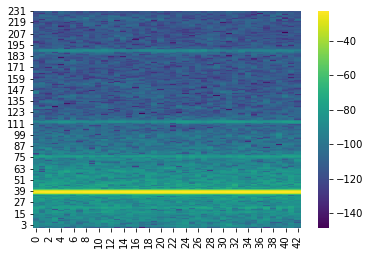

In [21]:
k=0
sns.heatmap(a[k].T.iloc[::-1],cmap='viridis')
print(a[k].T.iloc[::-1].idxmax())